Let say we have an family of images that we want to represent a distribution over. So we have a rather large set of images... $im \in \mathbb I^{255^{28 \times 28}}$.

Can we construct a tensor network to factorise this large space?
We could use the grid graph as the topology of the network, and ...?

In [47]:
255**(28*28)

5339510688656375641538455840731393116555962390778690443912003489494981839577227757185603967798049978904307172202826399147171377297670729033203077689602086394023433014708629420971445914303826784106519755241008143812654650790551102040952797040397973011298403851361713884112857096588682250052597151862992431896799330066296380824751908849300640275125179416583367601977151440206720420860154970991756461680775894707005813403759818889382852881590881474906356606494026669008208601898168044708669657217147070237943744504922200345727585226058274190360688479671806273264968159109550023587839101427537110294006343012130644368064052181035732530107794247558480027337926682112054819895123818435594376047193447217294715813269064386236759373260435906553208424441832863917254863774192253330560177881338424361470669758018935927562446404654385560778144173794888911562811186420890929979413479586504107927316363751631797687524756350897891254405990589288932117194447871057943309481653137109867008074861244156220483214107582

In [13]:
import scipy.linalg as la
import numpy as np

import matplotlib.pyplot as plt

In [14]:
def total_params(d, r, n, m):
    """
    d: dim of node
    r: rank
    n: width
    m: height
    """
    # TODO extend to channels
    total = 0
    
    total += 4*d*r**2  # the corners
    total += (n+m-4)*(d*r**3) # the sides (minus corners)
    total += (m-2)*(n-2)*(d*r**4)
    return total

In [35]:
d, r, n, m = 255, 2, 28, 28
N = total_params(d, r, n, m)
N

2868240

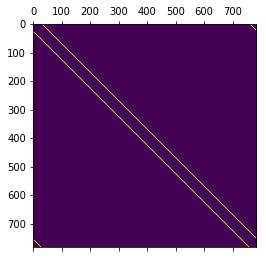

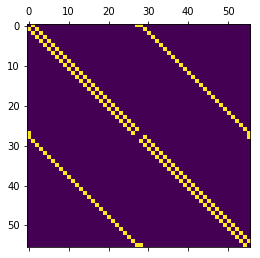

In [37]:
v = np.zeros(n)
v[1] = 1
v[-1] = 1

# TODO this isnt perfect. it wraps the grid at the edges

offdi = la.circulant(v)
I = np.eye(n)

A = np.kron(offdi,I) + np.kron(I,offdi)
plt.matshow(A)
plt.matshow(A[:28*2,:28*2])

In [40]:
degrees = np.sum(A, axis=0)

In [42]:
cores = [np.random.random([d]+[r]*int(deg))for deg in degrees]

In [44]:
def construct():
    # TODO would prefer to do any/all operations on the
    # cores and not the tensor itself...
    # well... we cant construct it... its too big.
    pass

In [56]:
class TN():
    def __init__(self, dim, rank, topology, initializer=np.random.random):
        self.topology = topology
        self.rank = rank
        self.dim = dim
        self.cores = [initializer([dim]+[rank]*int(deg)) 
                      for deg in np.sum(topology, axis=0)]
        
    def matmul(self, x):
        pass
    
    def contract(self, dims):
        pass
    
    def mul(self, x):
        pass

In [57]:
np.sum([np.prod(c.shape) for c in cores])

3198720

So if rank == 1 then we are modeling each node as being independent and just taking the outer product of each according to the topology!? Does the topology make any difference here!?

In [70]:
tn = TN(255, 2, A, np.zeros)

# given some image
im = np.random.randint(0, 255, (28, 28), dtype=np.int32)
# want tn[im] += 1
for i in range(len(tn.cores)):
    p = im.ravel()[i]
    tn.cores[i][p, :, :, :, :] += 1
    
# can the do some sort of label propagation
# to capture local conditional dependence!?

In [90]:
C = np.cov(im.reshape((-1, 1)))

/home/act65/anaconda3/envs/mri2/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.
/home/act65/anaconda3/envs/mri2/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/home/act65/anaconda3/envs/mri2/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


In [88]:
C[:10, :10]

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])